# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig
from Visualization_helpers import *

2024-09-30 09:39:20.477893: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-30 09:39:20.478548: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 09:39:20.481808: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 09:39:20.526179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-30 09:39:22.063855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [8]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = subset_df(df, split = "distort"), metric = "Combined_Metric", return_df=True)
results_df

csv_file      SSMA     MAGAN       DTA    SPUD_D      SPUD  \
0   water_potability -0.200505  0.058677 -0.117350  0.129711  0.119342   
1                zoo  0.132319  0.242427  0.425420  0.264484  0.274091   
2    winequality-red -0.217848  0.081874  0.520290  0.325448  0.130353   
3        hill_valley  0.315718  0.415131  0.574157  0.471245  0.534643   
4     Medicaldataset  0.327025  0.626990  0.469962  0.685660  0.632966   
5              glass  0.276065  0.677559  0.788880  0.692484  0.635492   
6      heart_disease  0.489604  0.676768  0.793713  0.715267  0.659933   
7           diabetes  0.510084  0.710938  0.855122  0.772571  0.760417   
8          audiology  0.342392  0.725845  0.899132  0.731219  0.763019   
9      heart_failure  0.628342  0.742419  0.834673  0.798895  0.789298   
10         hepatitis  0.572172  0.753623  0.839740  0.778250  0.796996   
11           titanic  0.638493  0.713429  0.811268  0.803491  0.803329   
12             chess       NaN       NaN       NaN       NaN       NaN   
13          waveform       NaN       NaN       NaN       NaN       NaN   
14   artificial_tree       NaN       NaN       NaN       NaN       NaN   
15       tic-tac-toe  0.454882  0.832961  0.846323  0.833358  0.888309   
16      segmentation  0.362752  0.824645  0.913215  0.868601  0.810427   
17           ecoli_5  0.544867  0.749207  0.915223  0.876946  0.853052   
18               crx  0.622061  0.825279  0.908688  0.888436  0.870448   
19     balance_scale  0.702135  0.897600  0.913496  0.885064  0.916800   
20            flare1  0.800820  0.897785  0.902897  0.890807  0.897152   
21               car  0.486560  0.864583  0.899953  0.905230  0.926505   
22          treeData  0.510440  0.439535  0.917737  0.876949  0.879165   
23        parkinsons  0.709722  0.902564  0.965448  0.937462  0.897436   
24             seeds  0.797984  0.904523  0.958651  0.946643  0.944698   
25     breast_cancer  0.684170  0.800873  0.966904  0.914834  0.974069   
26        ionosphere  0.736841  0.797713  0.966206  0.867152  0.937322   
27              iris  0.829405  0.939911  0.795367  0.940133  0.966622   
28       Cancer_Data  0.821640  0.852373  0.980417  0.952897  0.961292   
29         optdigits       NaN       NaN       NaN       NaN       NaN   
30           S-curve       NaN       NaN       NaN       NaN       NaN   
31             blobs       NaN       NaN       NaN       NaN       NaN   

         DIG     CwDIG      NAMA       PCR      JLMA   Split_A   Split_B  \
0   0.171816  0.132166  0.249292 -0.255806  0.255961  0.294878  0.260567   
1   0.263700  0.258308  0.247133  0.202601  0.217675  0.415842  0.366337   
2   0.266904  0.295633  0.353290 -0.171491  0.425393  0.315197  0.273296   
3   0.491335  0.569557  0.418456  0.110941  0.311888  0.790429  0.790429   
4   0.674574  0.686782  0.733463  0.263299  0.756766  0.717968  0.674754   
5   0.731352  0.741626  0.718753  0.345484  0.744650  0.836449  0.836449   
6   0.735129  0.714360  0.718441  0.569182  0.710415  0.757576  0.757576   
7   0.771040  0.788095  0.795937  0.526334  0.823947  0.700521  0.686198   
8   0.791524  0.759571  0.763352  0.400623  0.835346  0.900000  0.889474   
9   0.795181  0.738420  0.791199  0.604625  0.789152  0.799331  0.799331   
10  0.796944  0.777699  0.768273  0.629936  0.800252  0.797101  0.789855   
11  0.805847  0.836055  0.846220  0.629522  0.821037  0.877809  0.877809   
12  0.824654       NaN       NaN       NaN       NaN  0.950250  0.952441   
13  0.826717       NaN       NaN       NaN       NaN  0.385600  0.389600   
14  0.834007       NaN       NaN       NaN       NaN  0.747000  0.745400   
15  0.863115  0.867241  0.862120  0.418530  0.849687  0.736952  0.736952   
16  0.872038  0.849947  0.876575  0.549345  0.909863  0.909953  0.909953   
17  0.883315  0.877479  0.895744  0.578770  0.905203  0.914373  0.914373   
18  0.887395  0.887843  0.887037  0.767514  0.904939  0.900602  0.900602   
19  0.887877  0.908690  0.887165  0.696747  0.857

In [3]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
#tma.clear_directory(text_curater="RF_BL", directory="nfault") #, not_text=[]

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

'Clear Directory'

In [3]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="car.csv", split= "random", percent_of_anchors= [0.05], verbose=2, random_state= 42)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_RF_SPUD_tests()
#test.run_DIG_tests(predict = False, page_ranks=["None"])
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
#test.run_JLMA_tests()
#test.run_PCR_tests()
#test.run_DIG_Conections_tests(page_ranks=["None"], predict = False)
#test.run_CSPUD_tests(operations= ["log", "sqrt", "normalize"])
#test.run_MALI_tests()
#test.run_RF_MASH_tests(DTM = ("hellinger", "log", "kl"))
#test.run_KEMA_tests()
#test.run_RF_BL_tests()

MDS initialized with 2 components

 
 
---------------------------       Initalizing class with car.csv data       ---------------------------

The knn values are: (2, 37, 72, 107, 142, 177, 212, 247, 282, 317)


In [3]:
#To upload new data
create_DataFrames()

File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/water_potability/MASH_RF(e1738)_DTM(hellinger)_AP(0.05-0.1-0.3-0.2)_371.npy is missing FOSCTTM or Cross_Embedding Score
File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/water_potability/MASH_RF(e2830)_DTM(hellinger)_AP(0.05-0.1-0.3-0.2)_371.npy is missing FOSCTTM or Cross_Embedding Score
File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/optdigits/MASH_RF(d7667)_DTM(hellinger)_AP(0.05-0.1-0.3-0.2)_695.npy is missing FOSCTTM or Cross_Embedding Score


In [6]:
"""
# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other
grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(
    csv_count=('csv_file', 'nunique'),   # Count occurrences of each seed
    method_count=('method', 'nunique')  # Count unique methods using each seed
).reset_index()

grouped["seed"].values
"""

'\n# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other\ngrouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby([\'seed\']).agg(\n    csv_count=(\'csv_file\', \'nunique\'),   # Count occurrences of each seed\n    method_count=(\'method\', \'nunique\')  # Count unique methods using each seed\n).reset_index()\n\ngrouped["seed"].values\n'

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

In [8]:
rf_df.sample(7)

csv_file   method  seed   split KNN  Percent_of_KNN  \
1117783       glass  SPUD_RF  1738  random   7            0.03   
1075268        iris  KEMA_RF  2830  random  38            0.19   
889531        seeds  SPUD_RF  1825  skewed  34            0.17   
845057          crx  SPUD_RF  2830  random  58            0.09   
168134   ionosphere  MASH_RF  1738  random  74            0.19   
214649        blobs  SPUD_RF  5198    even   2            0.01   
890247        seeds  MASH_RF  1738  random  10            0.05   

         Percent_of_Anchors Page_Rank  t_value  Predicted_Feature_MAE  \
1117783                0.15       NaN      NaN                    NaN   
1075268                 NaN       NaN      NaN                    NaN   
889531                 0.15       NaN      NaN                    NaN   
845057                 0.30       NaN      NaN                    NaN   
168134                 0.05      None     -1.0                    NaN   
214649                 0.30       NaN      NaN                    NaN   
890247                 0.20      None     -1.0                    NaN   

             Operation algorithm   FOSCTTM  Cross_Embedding_KNN  \
1117783           sqrt      mean  0.446895             0.387850   
1075268            lin       NaN  0.213556             0.700000   
889531           float      mean  0.351784             0.432161   
845057            sqrt   default  0.400720             0.558735   
168134   Not Optimized        kl  0.000000             0.000000   
214649             log       abs  0.056689             0.546667   
890247       Optimized       log  0.135009             0.889447   

         A_Classification_Score  B_Classification_Score  Combined_Metric  
1117783                0.686916                0.691589        -0.059044  
1075268                0.960000                0.493333         0.486444  
889531                 0.889447                0.924623         0.080377  
845057                 0.884036                0.605422         0.158015  
168134                 0.928775                0.931624         0.000000  
214649                 0.660000                0.676667         0.489978  
890247                 0.854271                0.944724         0.754438

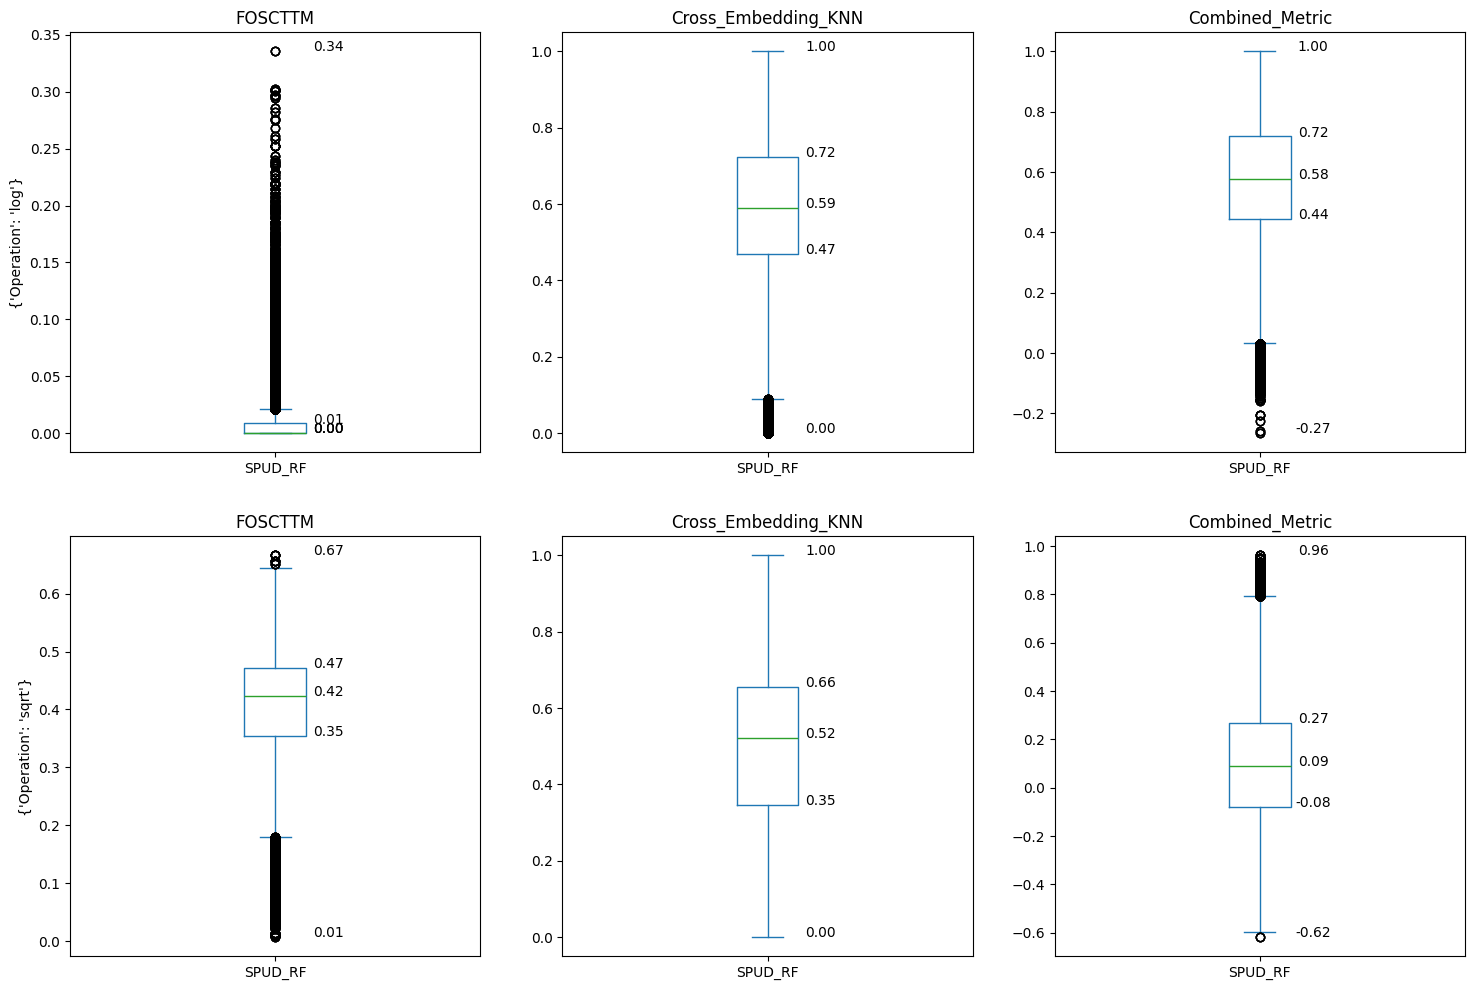

In [11]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column" : "Combined_Metric"}]
rows = [#{"Operation" : "None" #, "csv_file" : "iris"
         #}, 
        {"Operation" : "log" #, "csv_file" : "iris"
         },
         {"Operation" : "sqrt" #, "csv_file" : "iris"
         }
         ]

plot_in_fig(df = subset_df(rf_df, method = "SPUD_RF"), columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

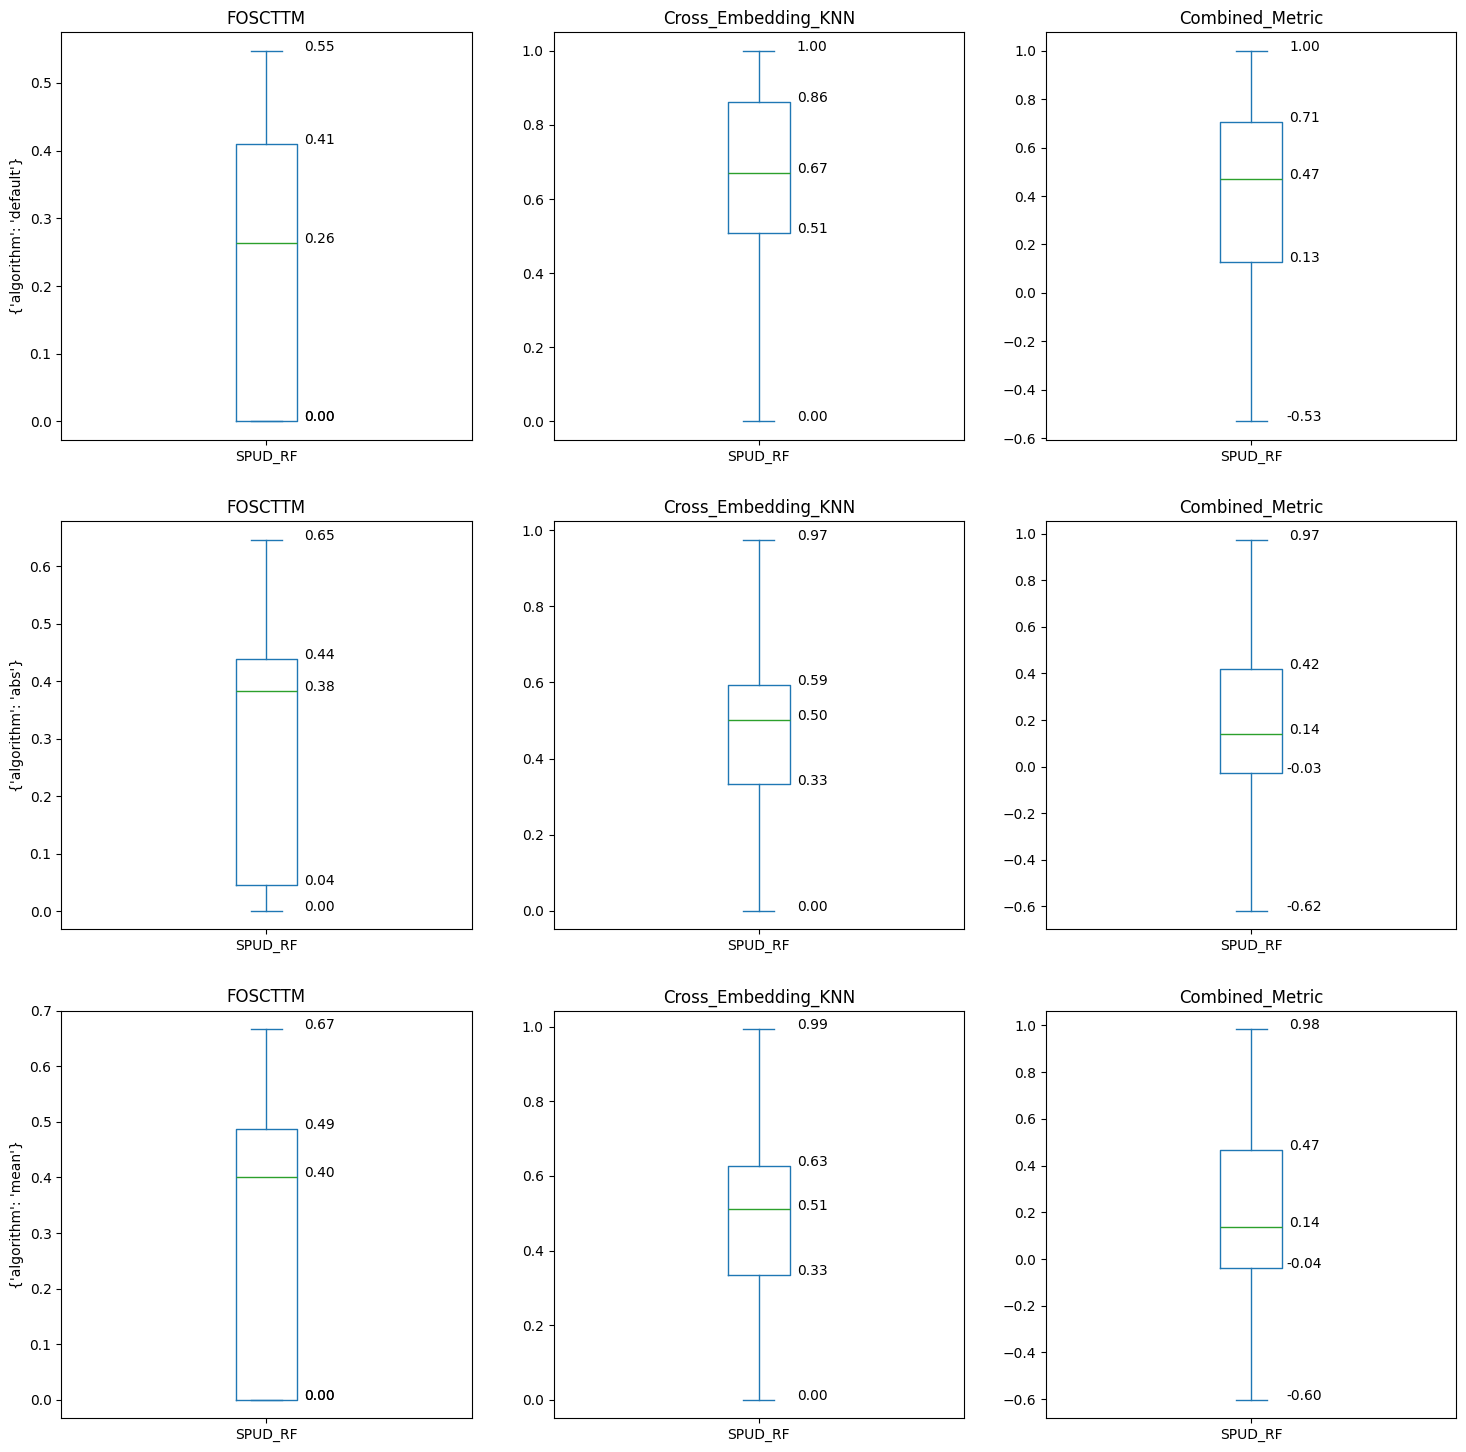

In [6]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column" : "Combined_Metric"}]
rows = [{"algorithm" : "default" #, "csv_file" : "iris"
         }, 
        {"algorithm" : "abs" #, "csv_file" : "iris"
         },
         {"algorithm" : "mean" #, "csv_file" : "iris"
         }
         ]

plot_in_fig(df = subset_df(rf_df, method = "SPUD_RF"), columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

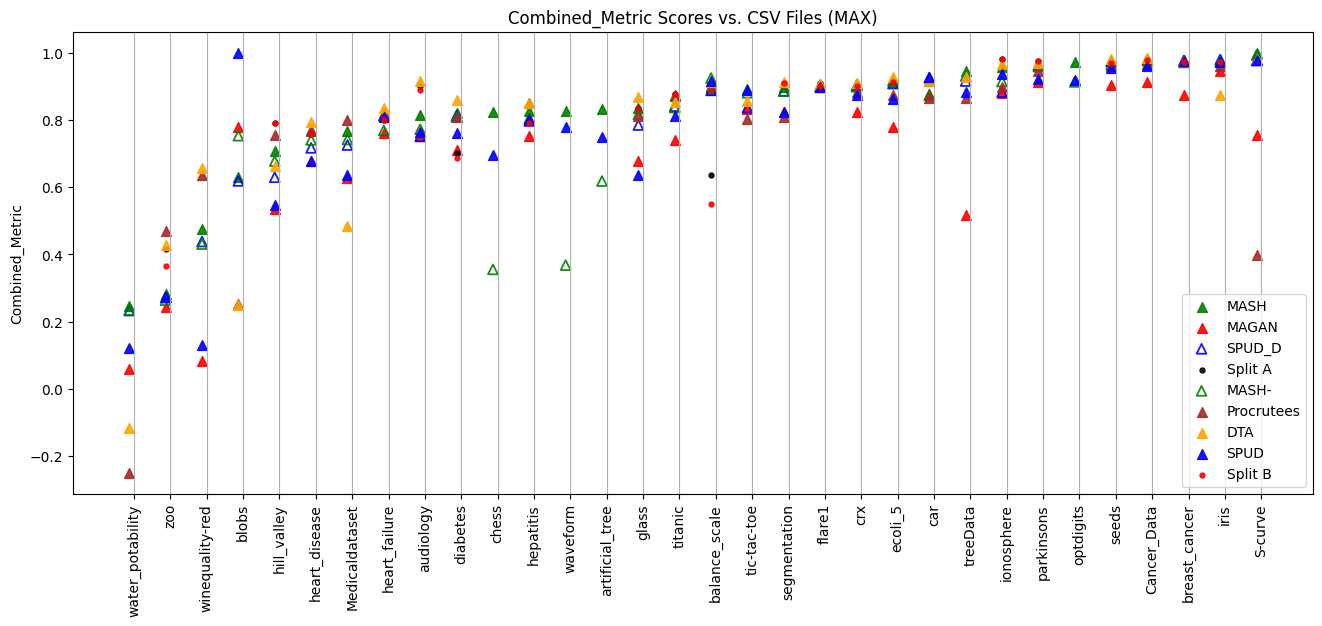

In [6]:
plt_methods_by_CSV_max(df = df, metric = "Combined_Metric", plot_methods = ["PCR", "MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG", "Split_A", "Split_B"])

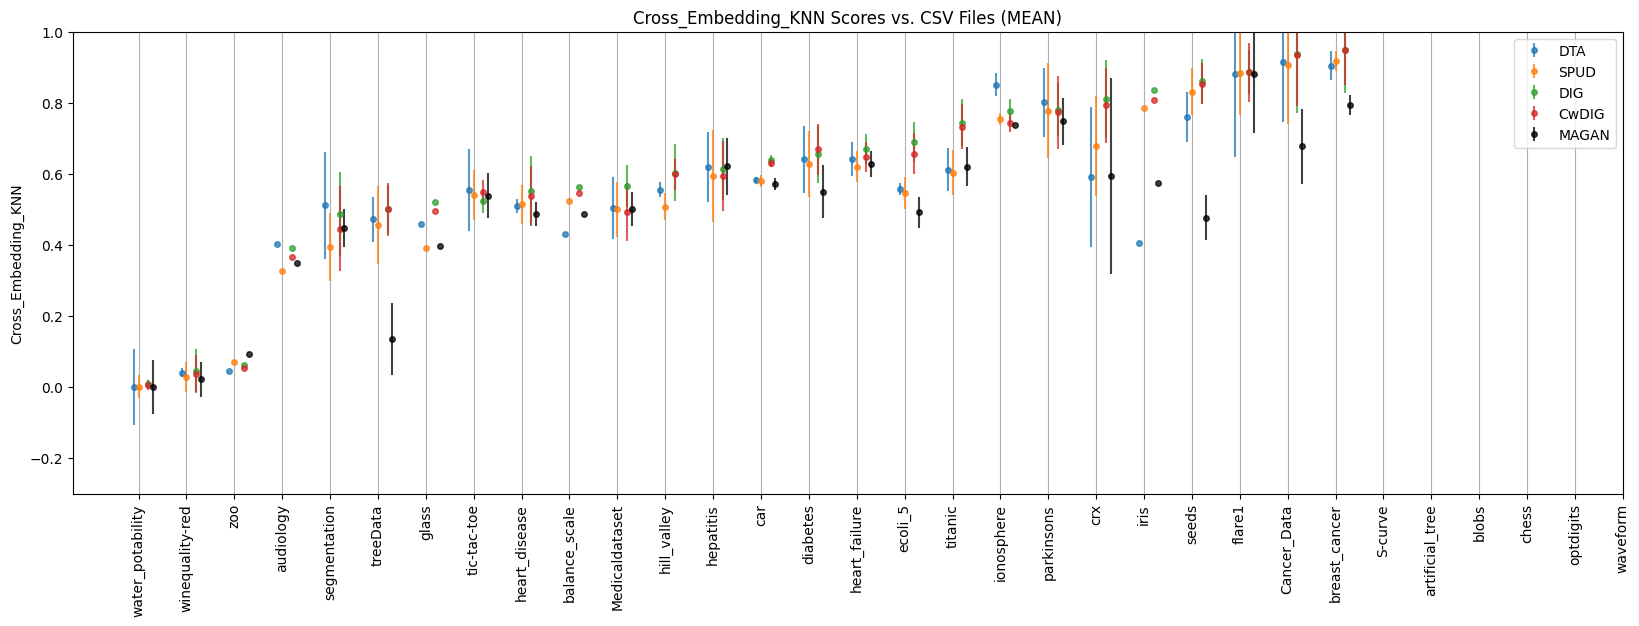

In [12]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG"])

RF Plots

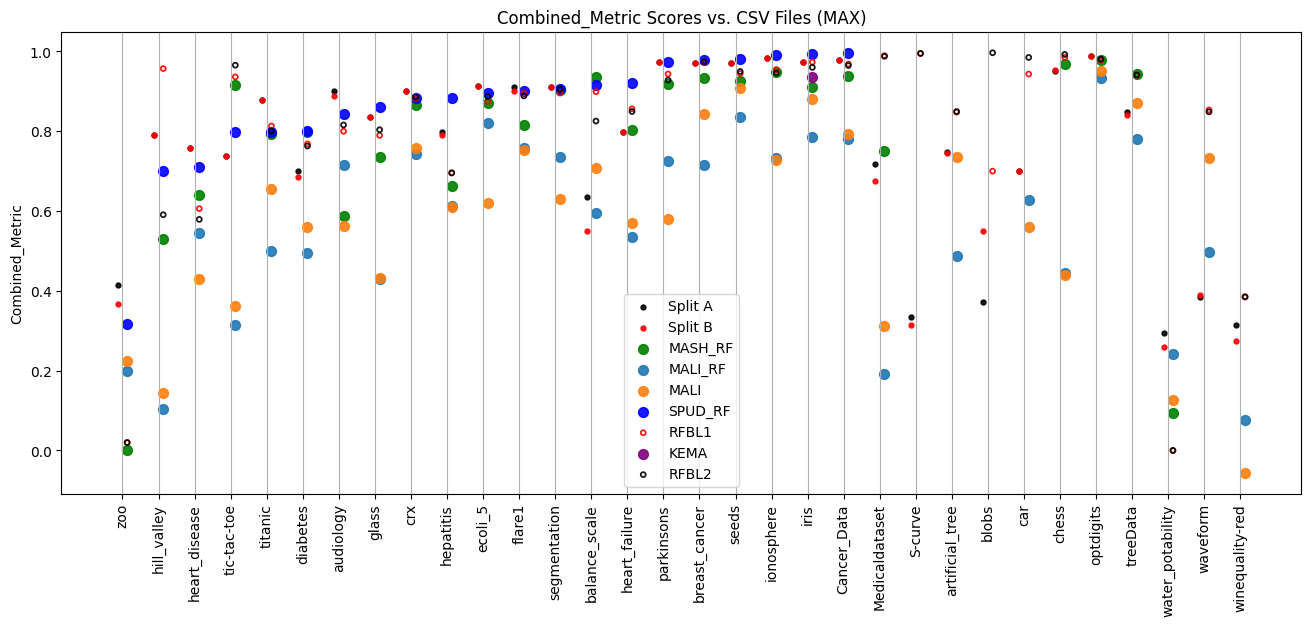

In [10]:
#RF Plot
plt_methods_by_CSV_max(df = subset_df(df, split = "distort"), sort_by= "SPUD_RF", metric = "Combined_Metric",  plot_methods = ["Split_A", "Split_B", "MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI", "RFBL1", "RFBL2"])

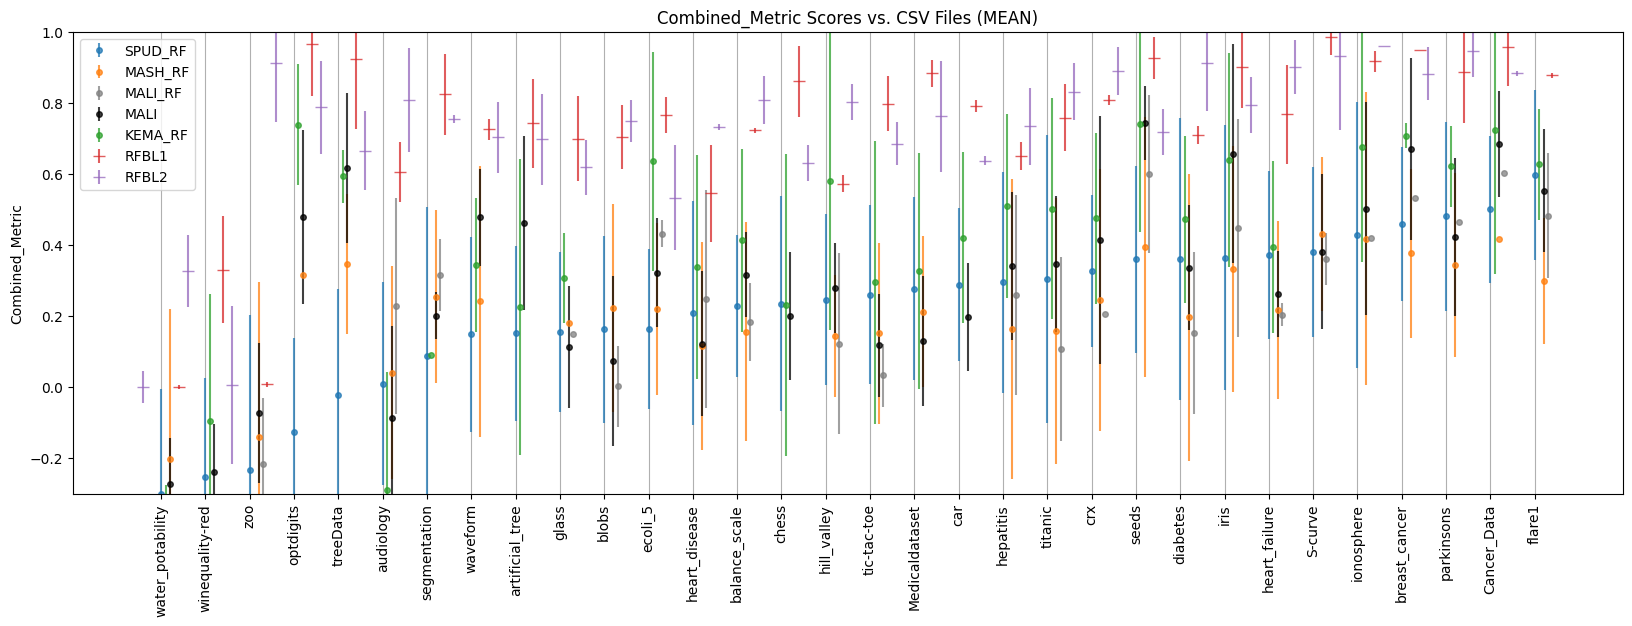

In [26]:
plt_methods_by_CSV_mean(df = rf_df, metric = "Combined_Metric", sort_by="SPUD_RF", plot_methods = ["MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI", "RFBL1", "RFBL2"])

### Simple Ranking

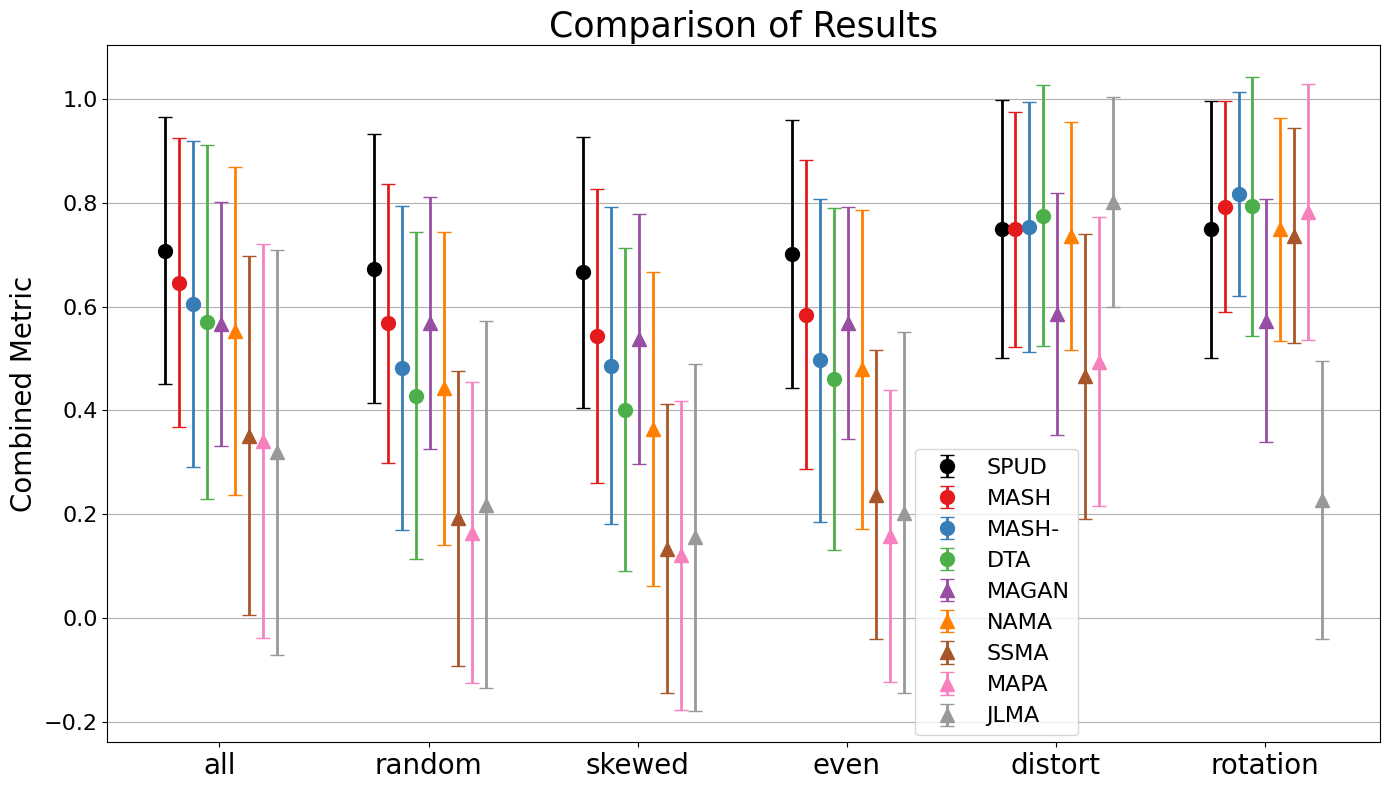

In [14]:
plot_ranks(columns_to_drop = ["RFBL1", "RFBL2", "SPUD_RF", "KEMA_RF", "MASH_RF", "MALI", "MALI_RF"], Percent_of_Anchors = 0.2)

In [33]:
get_mean_std_df(split = "random", Percent_of_Anchors = 0.2, scoring = "Combined_Metric", df = rf_df, columns_to_drop = ["MALI_RF", "MALI", "RFBL1", "RFBL2", 'SSMA', 'MAGAN', 'DTA',"KEMA_RF", 'SPUD_D', 'SPUD', 'DIG', 'CwDIG', 'NAMA', 'PCR', 'JLMA'])

MASH_RF   SPUD_RF
STD       0.225646  0.188219
Mean      0.639213  0.758324
rankings  2.000000  1.000000

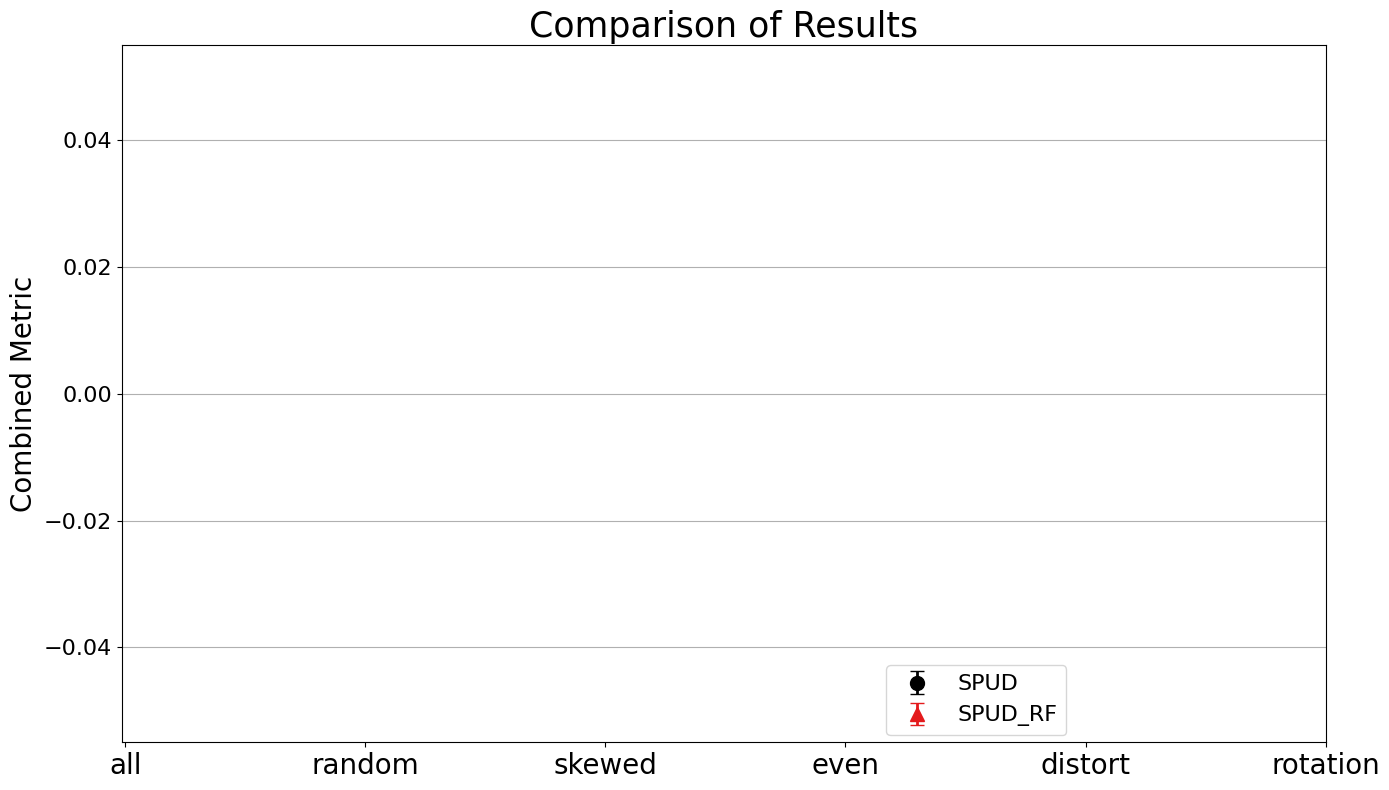

In [5]:
#NOTE: We need to run more KEMA, and MALI Tests. Somewhere they have a failed Test. 
plot_ranks(df = rf_df, columns_to_drop = ["MALI_RF", "MALI", "RFBL1", "RFBL2", 'SSMA', "SPUD_D", 'MAGAN', 'DTA', "MASH_RF", "KEMA_RF", 'DIG', 'CwDIG', 'NAMA', 'PCR', 'JLMA'])

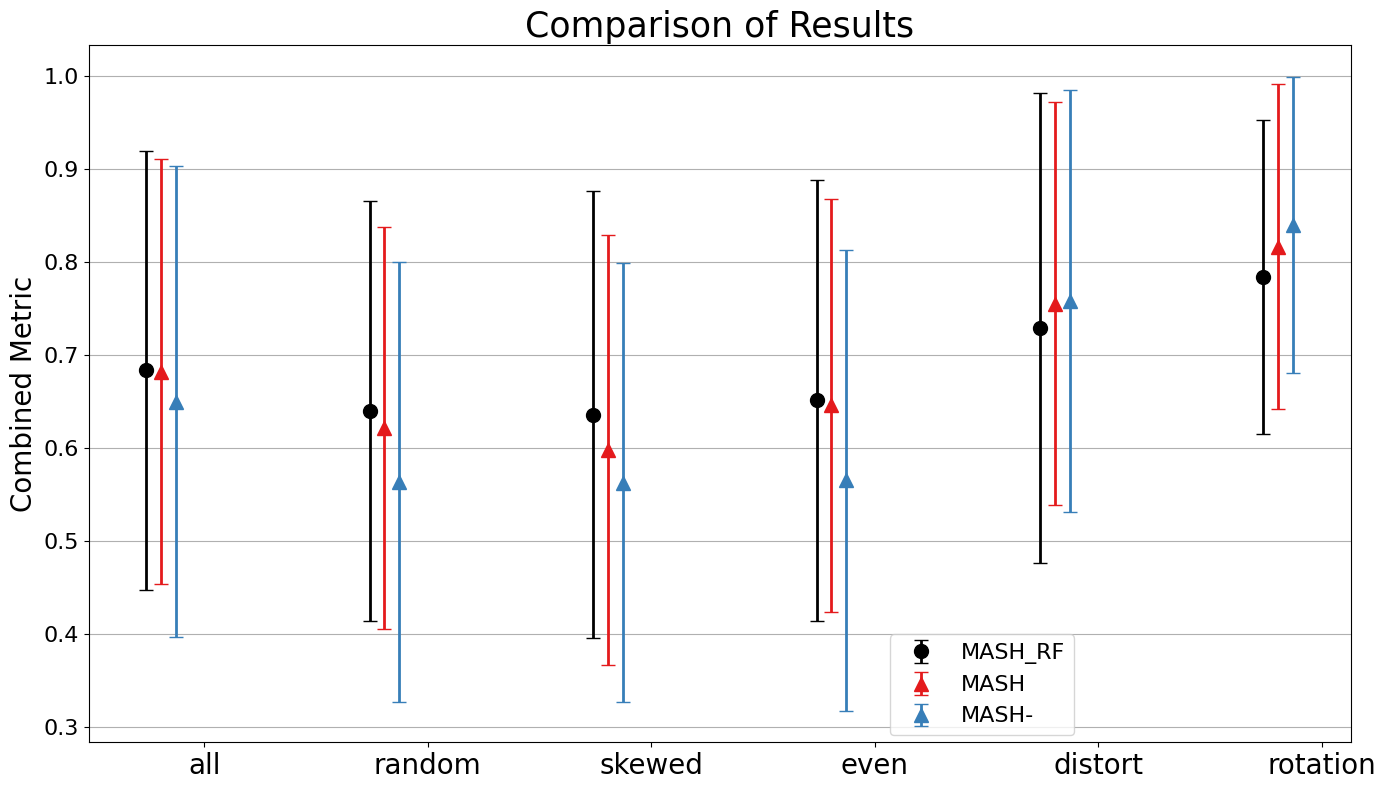

In [40]:
plot_ranks(df = df, Percent_of_Anchors = 0.2, columns_to_drop = ['SSMA', "SPUD_RF", 'MAGAN', 'DTA',"KEMA_RF", 'SPUD', 'NAMA', 'PCR', 'JLMA', "RFBL1", "RFBL2", "MALI_RF", "MALI"]) 

## Comparing Methods against Baselines

In [13]:
baseline_df = compare_with_baseline(scoring = "Cross_Embedding_KNN") #split = "skewed"
baseline_df

CwDIG  DIG  DTA  JLMA  KEMA_RF  MAGAN  MALI  MALI_RF  \
Random Forest            5    5    6     1        0      3     2        2   
K-Nearest Neighbors      6    6    0     3        0      1     2        2   

                     MASH_RF  NAMA  PCR  SPUD  SPUD_D  SPUD_RF  SSMA  
Random Forest             12     5    3     4       3       11     2  
K-Nearest Neighbors        9     2    2     2       2        8     0

array([<Axes: title={'center': 'Random Forest'}>,
       <Axes: title={'center': 'K-Nearest Neighbors'}>], dtype=object)

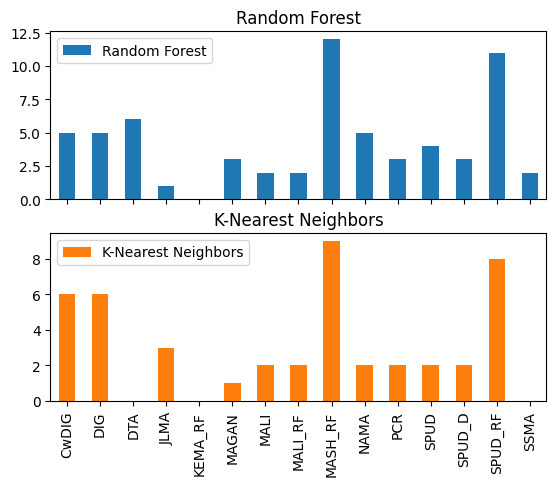

In [14]:
baseline_df.T.plot(kind = "bar", subplots=True)

## Comparing Parameters across all methods

### Line Plots

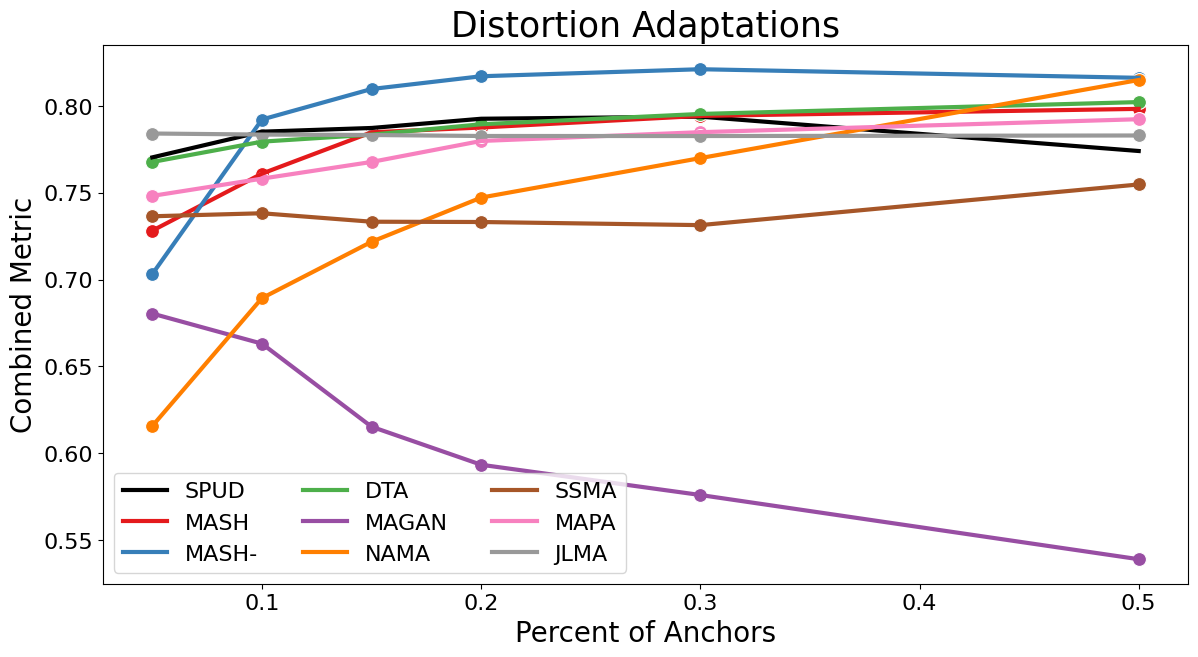

In [17]:
distort_turn = df[df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = distort_turn, metric = "Combined_Metric", custom_title="Distortion Adaptations", plt_legend = (0.01, 0.02))

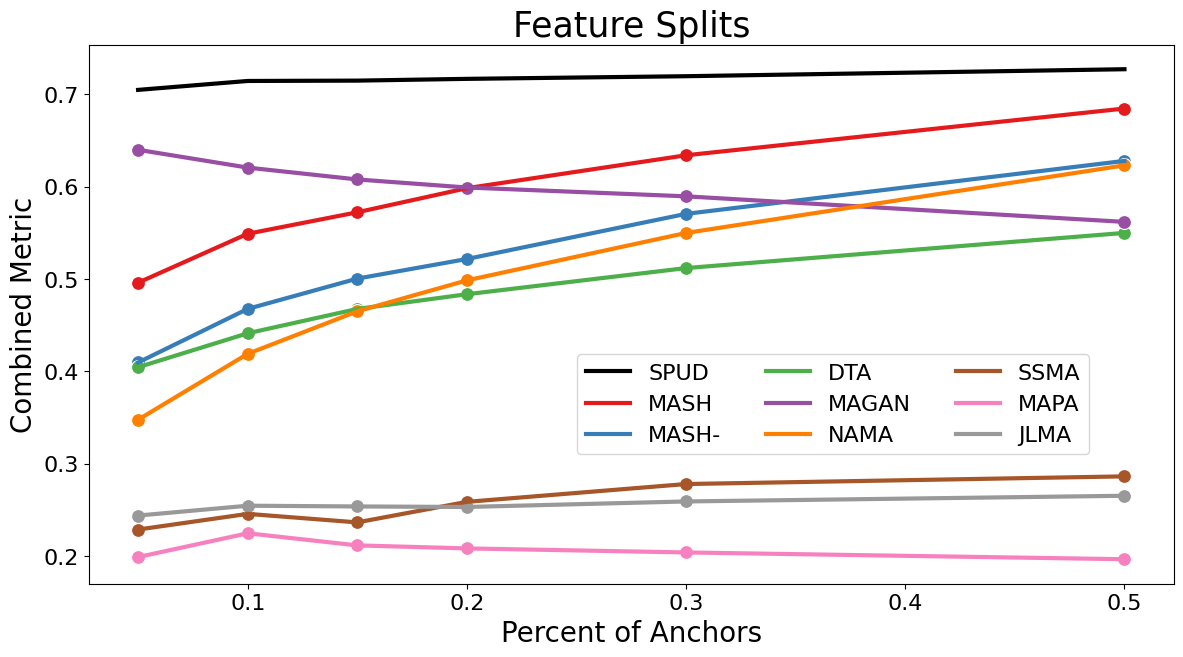

In [18]:
feature_splits = df[~df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = feature_splits, metric = "Combined_Metric", plt_legend = (0.45, 0.24), custom_title="Feature Splits")

### Contrasting RF to default

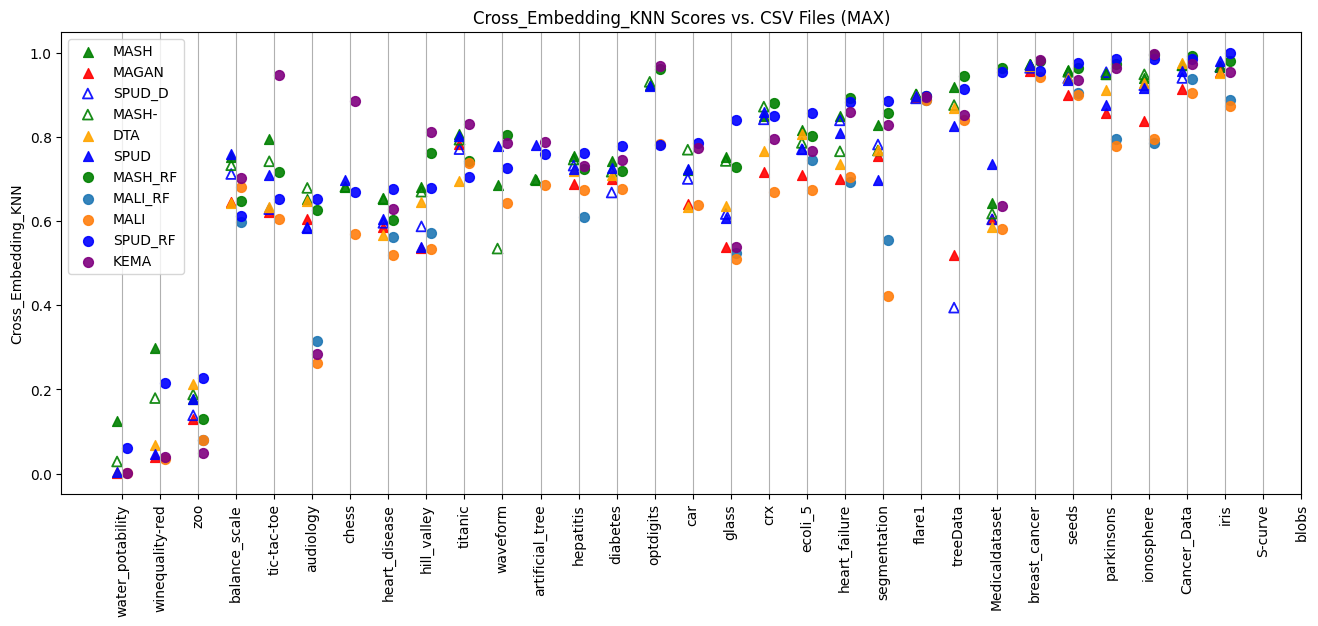

In [19]:
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), sort_by = "SPUD_RF", metric = "Cross_Embedding_KNN", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG", "MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI"])

In [20]:
df["method"].unique()

array(['MAGAN', 'SPUD', 'DTA', 'CwDIG', 'NAMA', 'DIG', 'PCR', 'JLMA',
       'SSMA', 'SPUD_RF', 'MALI_RF', 'MALI', 'MASH_RF', 'KEMA_RF'],
      dtype=object)

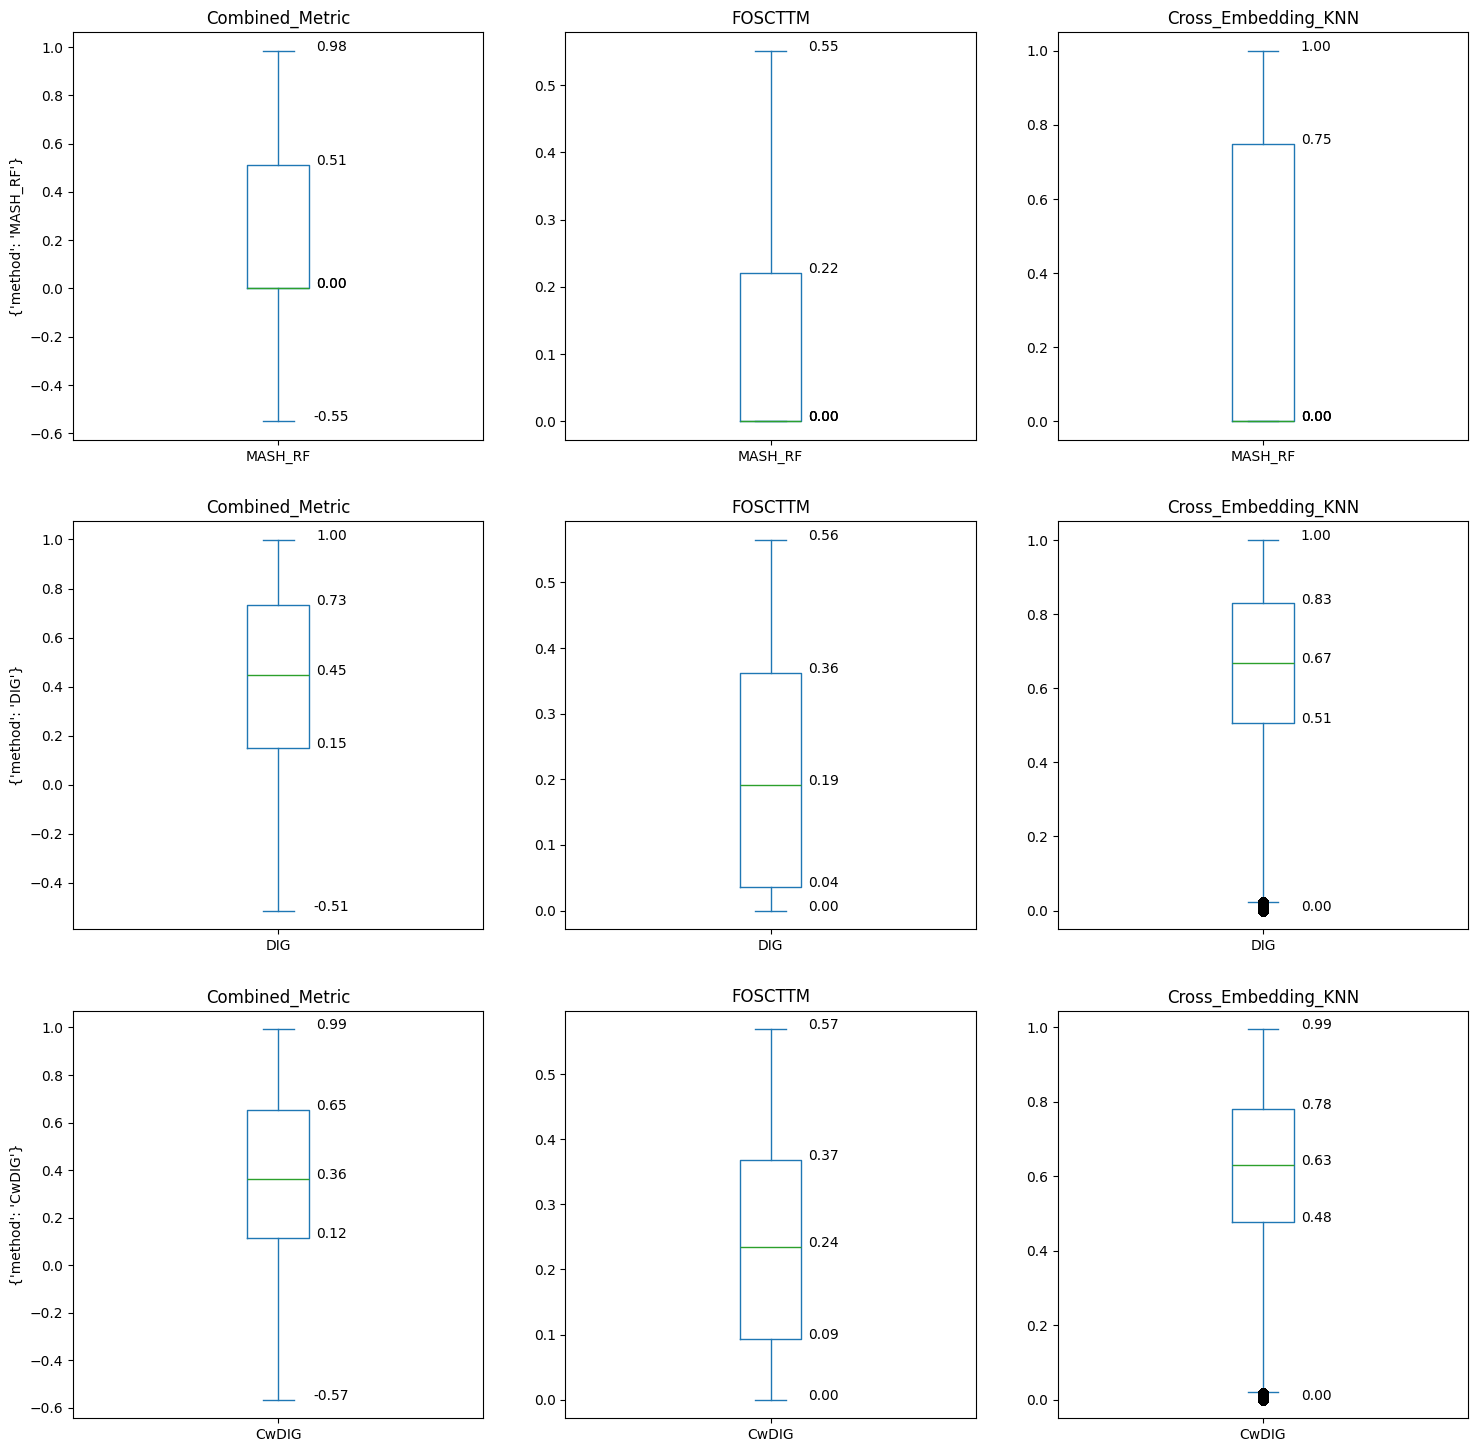

In [21]:
columns = [{"column": 'Combined_Metric'}, {"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}]
rows = [{"method" : "MASH_RF" #, "csv_file" : "iris"
        }, 
        {"method" : "DIG",
        },
        {"method" : "CwDIG",
        }]

plot_in_fig(df=df, columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

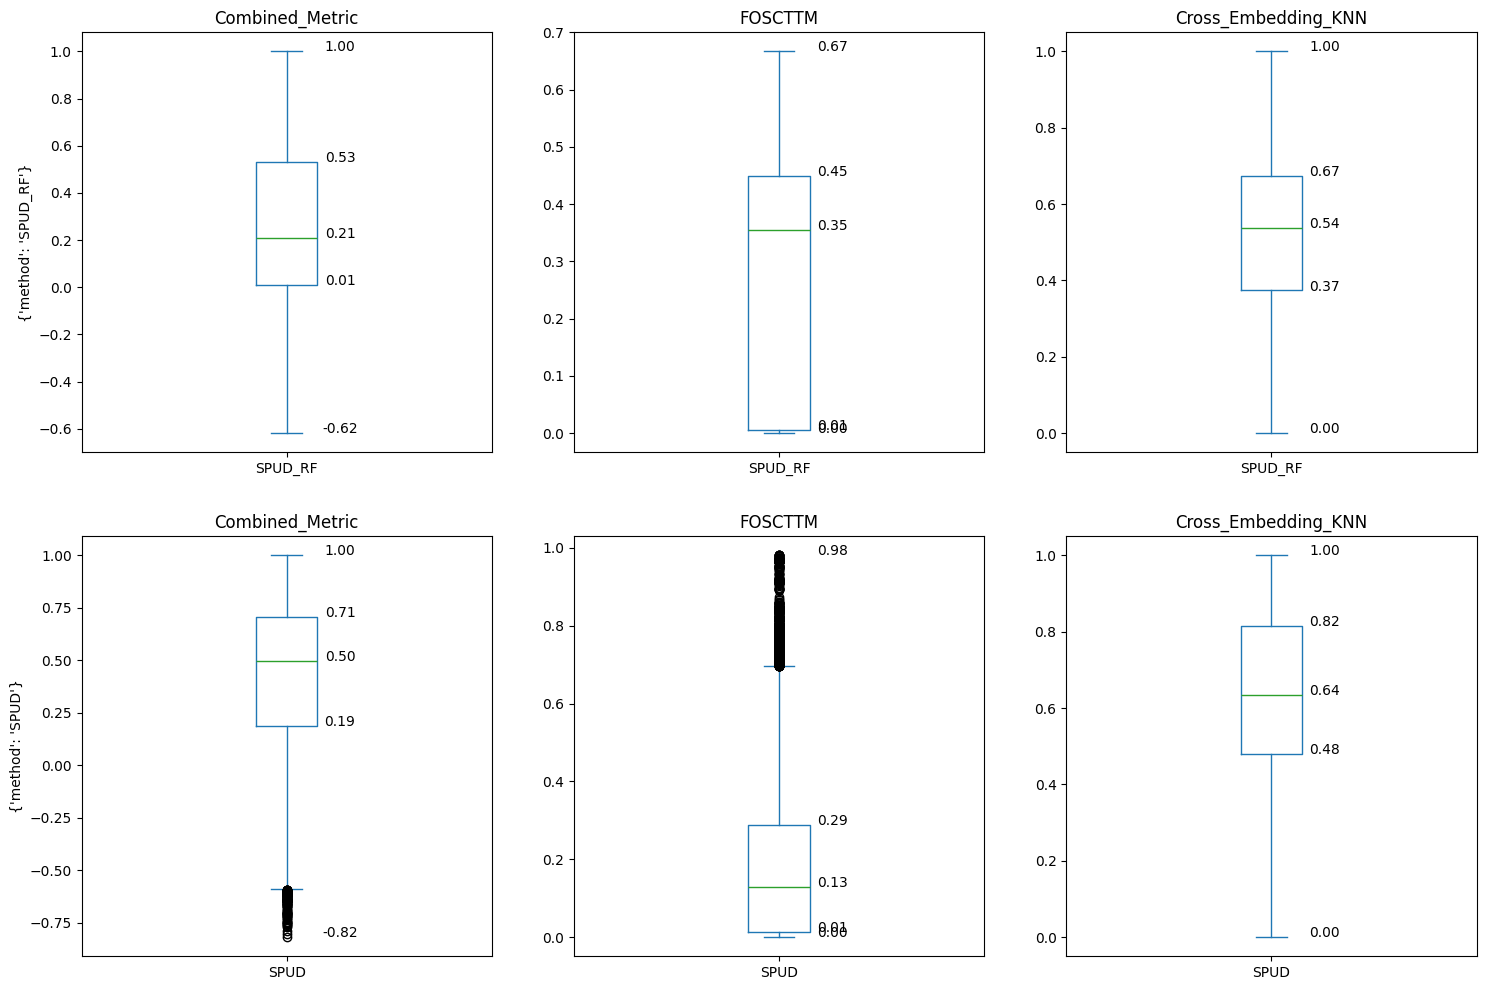

In [22]:
columns = [{"column": 'Combined_Metric'}, {"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}]
rows = [{"method" : "SPUD_RF" #, "csv_file" : "iris"
        }, 
        {"method" : "SPUD",
        }]

plot_in_fig(df=df, columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

### Sparse Data comparison

#### Set Up

In [23]:
from SPUD_Copy import SPUD_Copy
from DIG import DIG

In [24]:
sparse_dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)
sparse_dc.split_A = sparse_dc.split_A
sparse_dc.split_B = sparse_dc.split_B
#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


#### Sparse DIG

In [25]:
sparse_DIG = DIG(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, DTM = "log", knn = 4)

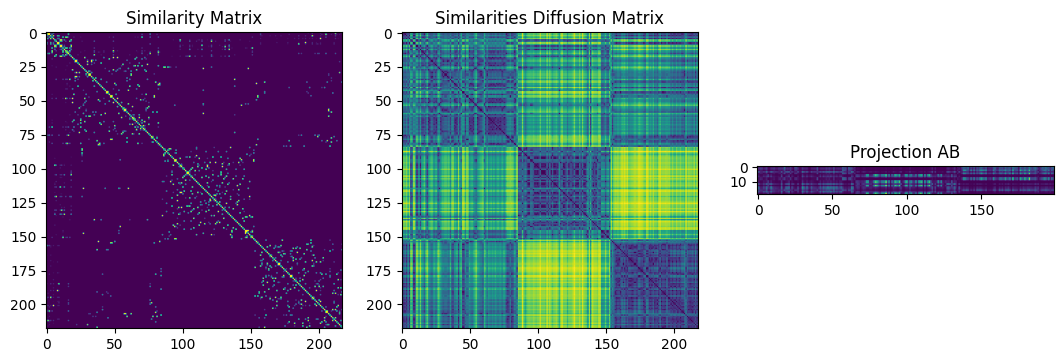

In [26]:
sparse_DIG.plot_graphs()

Model Stress: 91.00021307559541
Cross Embedding: 0.8391959798994975
Can't compute FOSCTTM with different domain shapes.


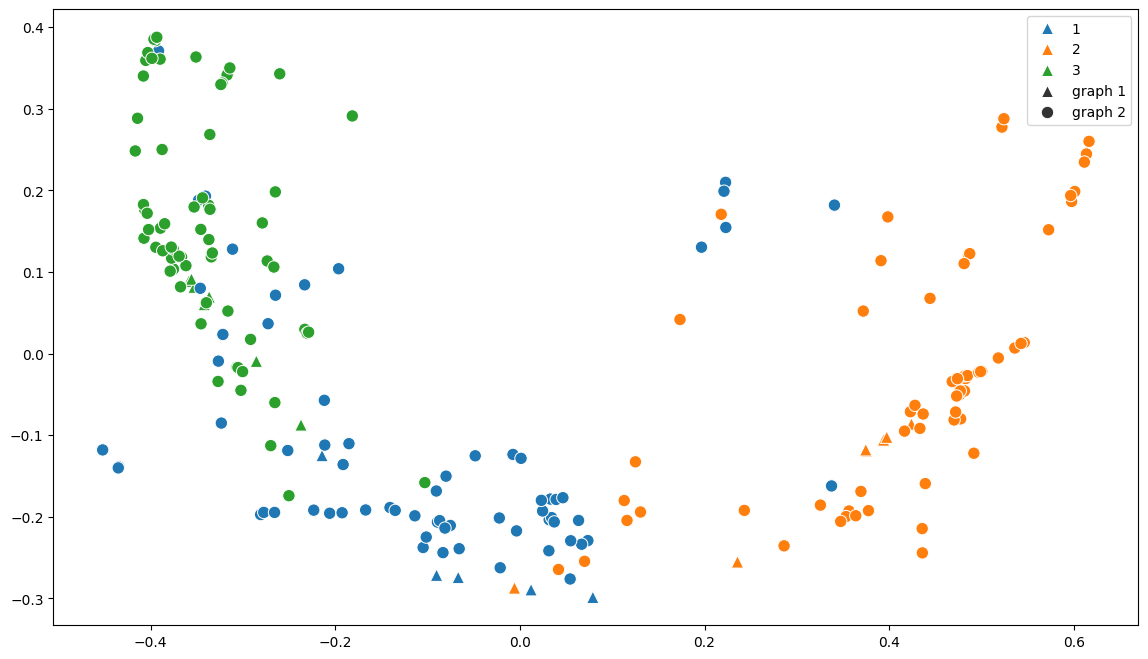

In [27]:
sparse_DIG.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

#### Sparse SPUD

In [28]:
sparse_spud = SPUD_Copy(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, operation = "sqrt", knn = 4)
#sparse_spud.plot_graphs()

Model Stress: 119.01061572536022
Cross Embedding: 0.8118222692409416
Can't compute FOSCTTM with different domain shapes.


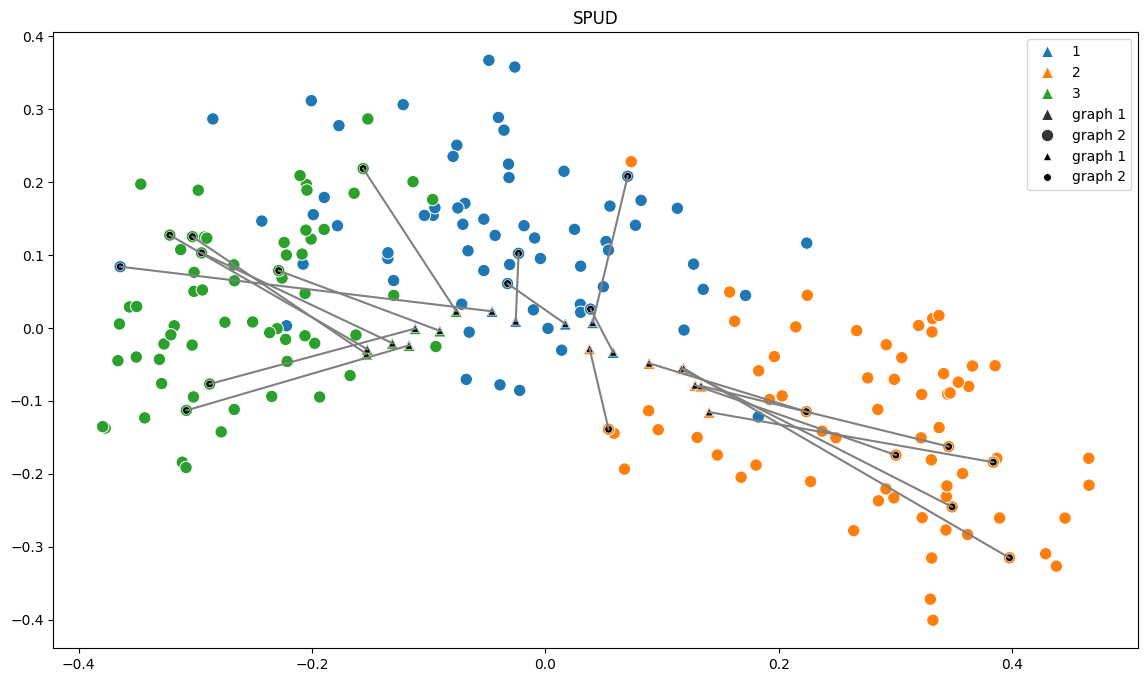

In [29]:

sparse_spud.plot_emb(sparse_labels, show_lines = False, show_anchors = True)

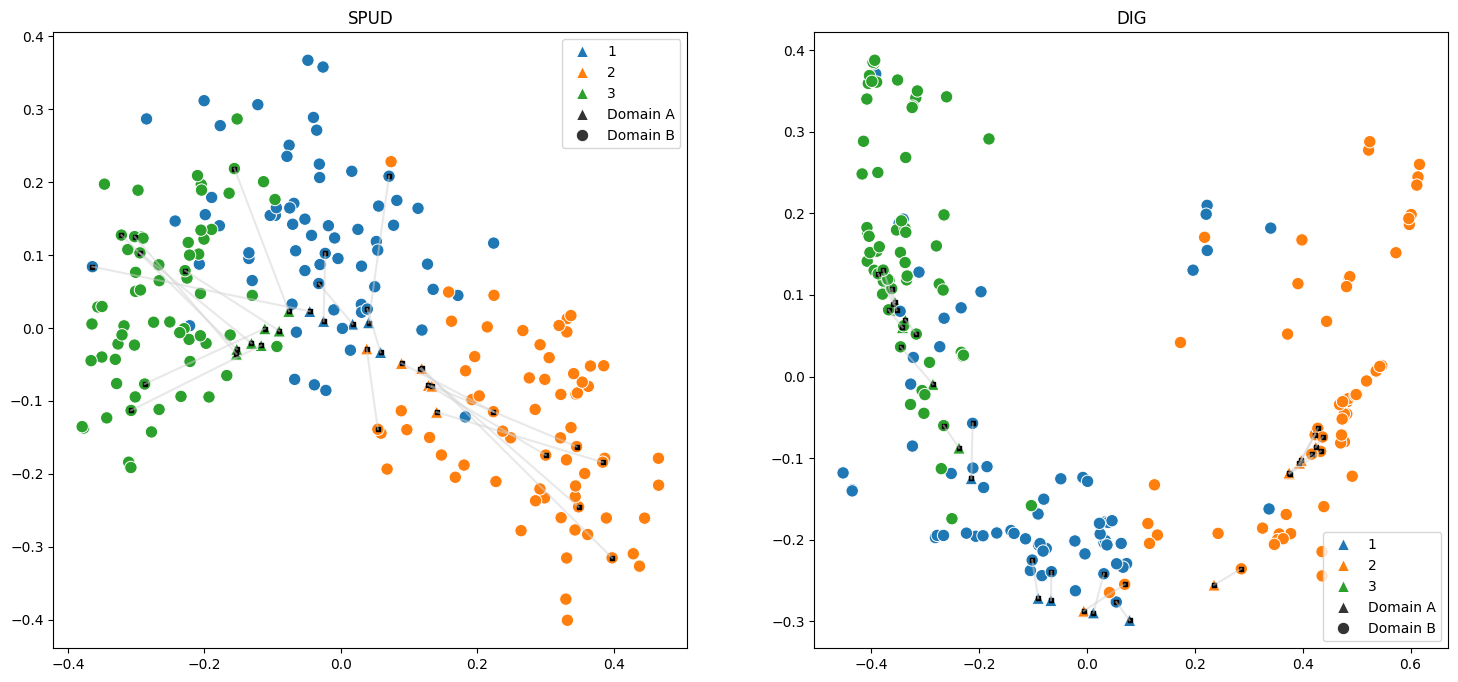

<Figure size 1400x800 with 0 Axes>

In [30]:
#Plot them side by side
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Set Title
axes[0].set_title("SPUD")
axes[1].set_title("DIG")

#Veiw the manifold. Those shown as Triangles are from GX
styles = ['Domain A' if i < sparse_spud.len_A else 'Domain B' for i in range(len(sparse_spud.emb[:]))]
plt.figure(figsize=(14, 8))

#Now plot the points
import seaborn as sns
sns.scatterplot(x = sparse_spud.emb[:, 0], y = sparse_spud.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[0])
sns.scatterplot(x = sparse_DIG.emb[:, 0], y = sparse_DIG.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[1])

#To plot line connections
for position, point in enumerate(random_points):
    axes[0].plot([sparse_spud.emb[position, 0], sparse_spud.emb[sparse_spud.len_A + point, 0]], [sparse_spud.emb[position, 1], sparse_spud.emb[sparse_spud.len_A + point, 1]], color = 'lightgrey', alpha = .5)
    axes[1].plot([sparse_DIG.emb[position, 0], sparse_DIG.emb[sparse_DIG.len_A + point, 0]], [sparse_DIG.emb[position, 1], sparse_DIG.emb[sparse_DIG.len_A + point, 1]], color = 'lightgrey', alpha = .5)

#Put black dots on the Anchors
axes[0].scatter(sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")
axes[1].scatter(sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")


#Show plot
plt.show()

## Label Prediction Visualization

In [31]:
dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "distort", percent_of_anchors= [0.8], verbose=2, random_state=42)


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

MDS initialized with 7 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


Cross Embedding: 0.9058450145464163
Can't compute FOSCTTM with different domain shapes.


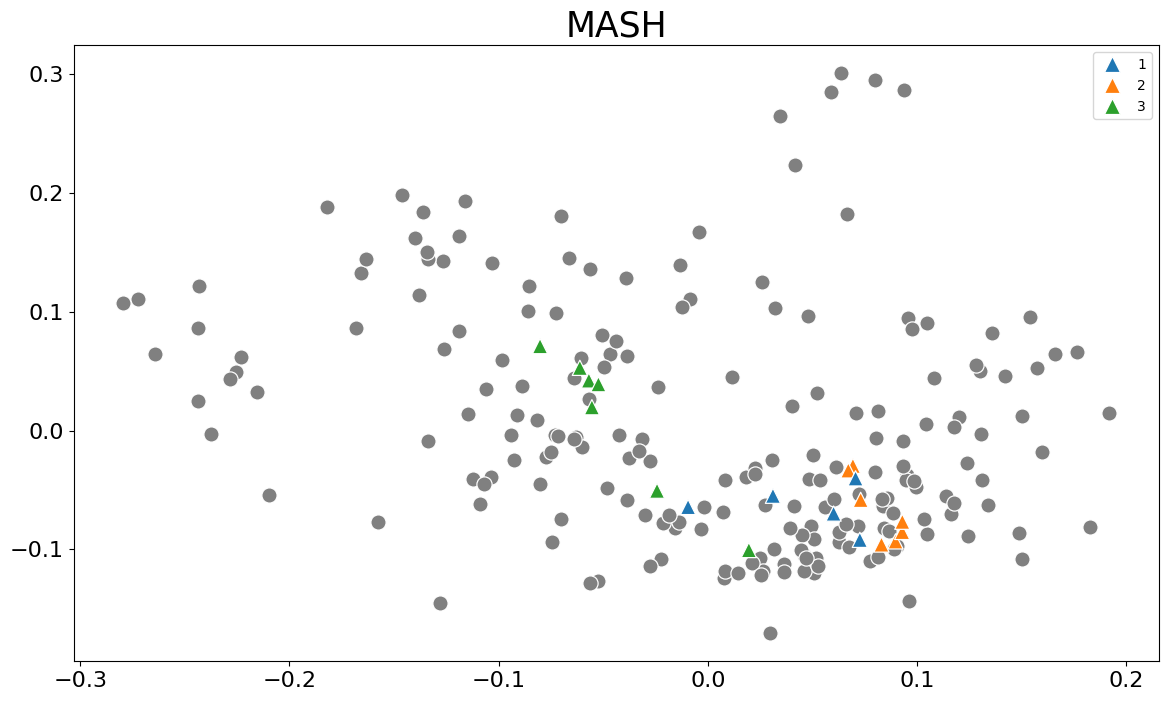

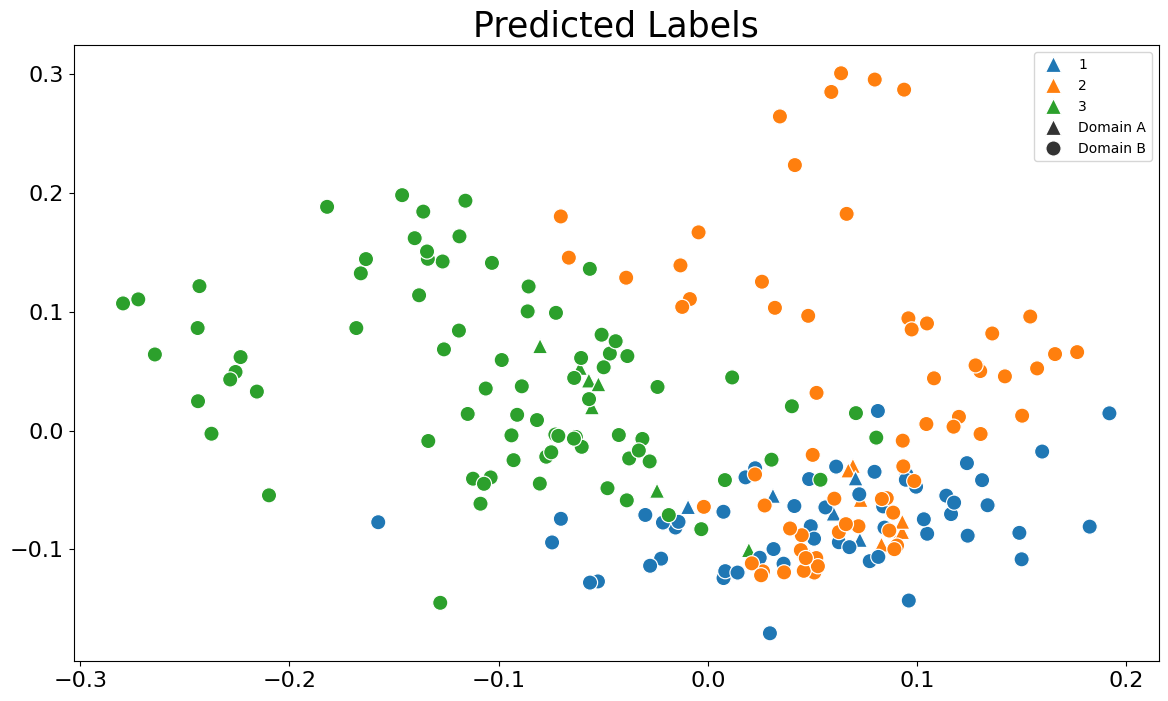

In [32]:
from MASH import MASH
LPD = MASH()
LPD.fit(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors)
LPD.plot_emb(sparse_labels, show_lines = False, show_anchors = False, show_pred = True, n_comp = 7) #Gets the embedding we can use

# Parameter Adjustment Heat map

In [33]:
from Visualization_helpers import plot_param_heat_map

## Mash

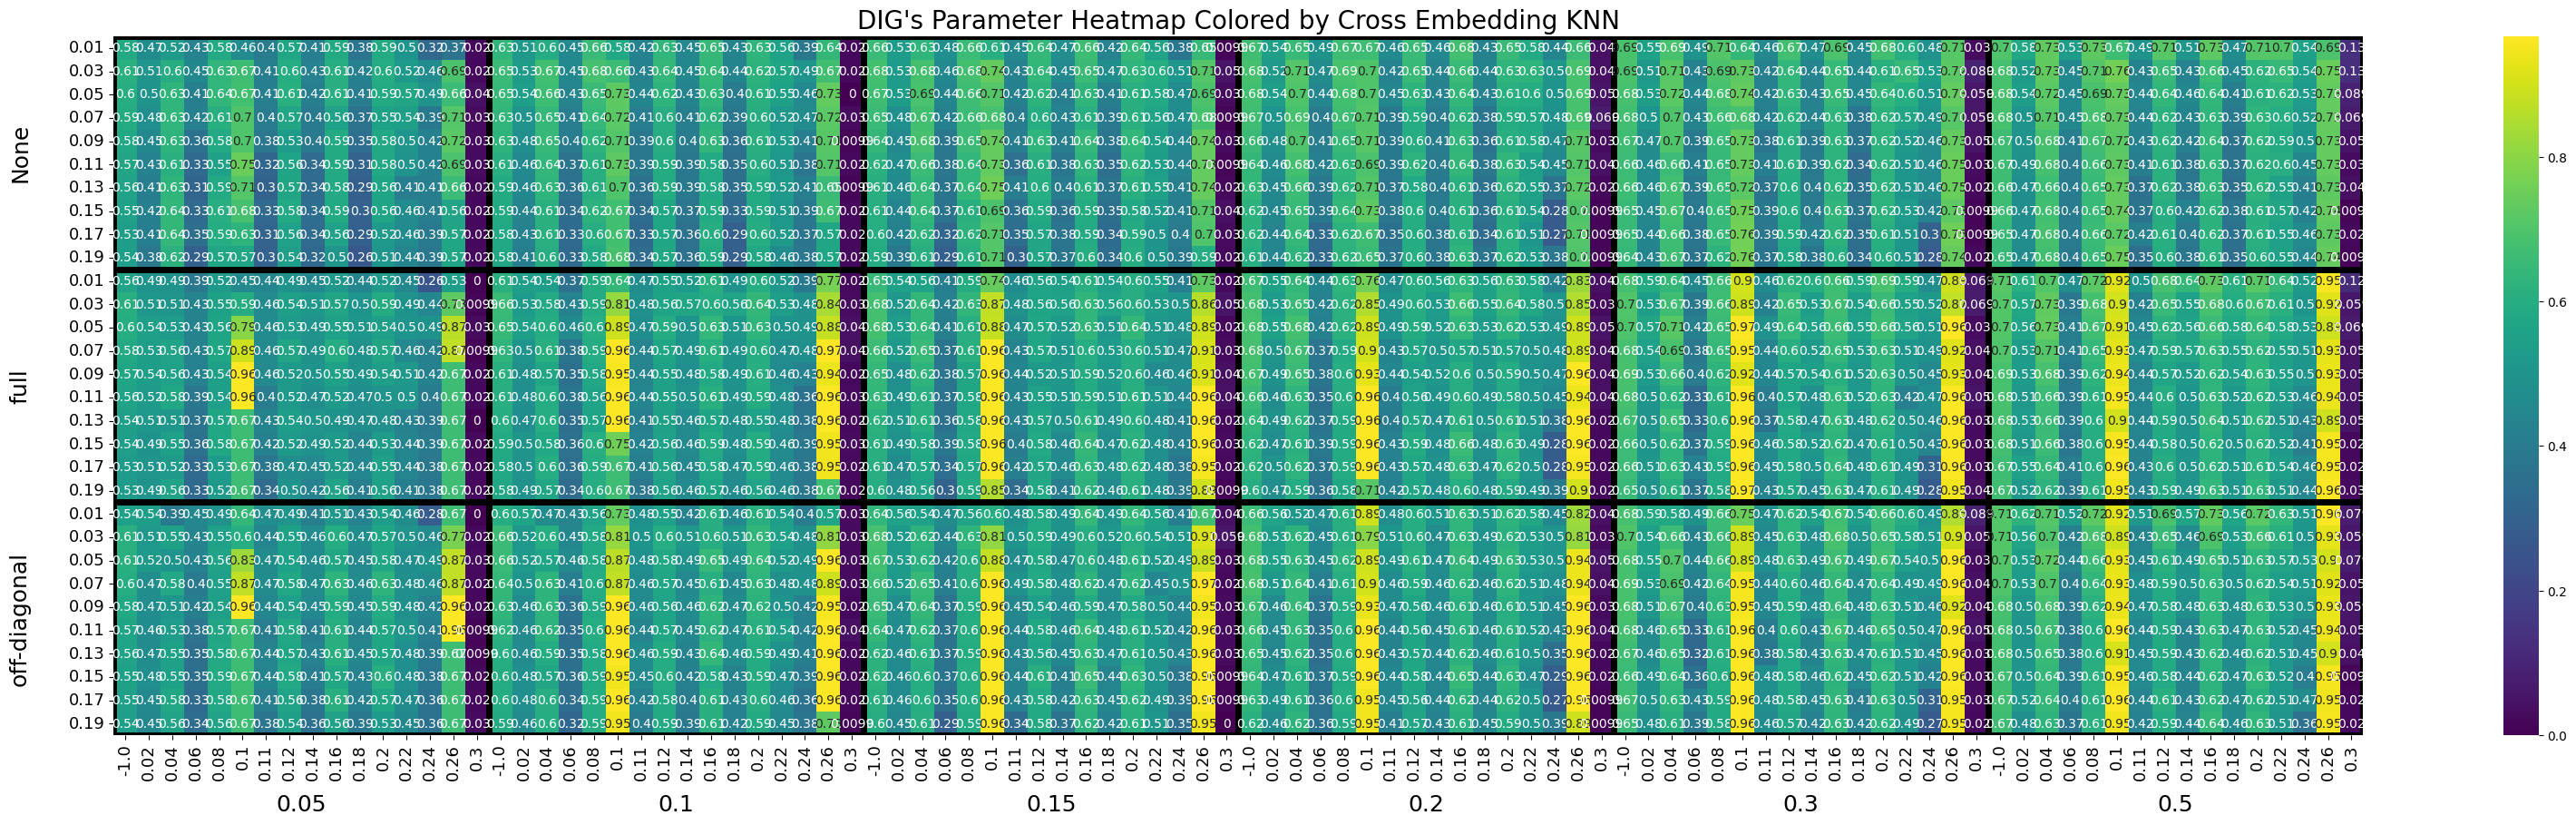

In [34]:
plot_param_heat_map(df = og_df, parameters = [ "Page_Rank", 'Percent_of_KNN', "Percent_of_Anchors", "t_value"], method = "DIG", metric = "Cross_Embedding_KNN", figsize = (40, 10))

## SPUD

In [35]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 't_value', 'Predicted_Feature_MAE',
       'Operation', 'algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

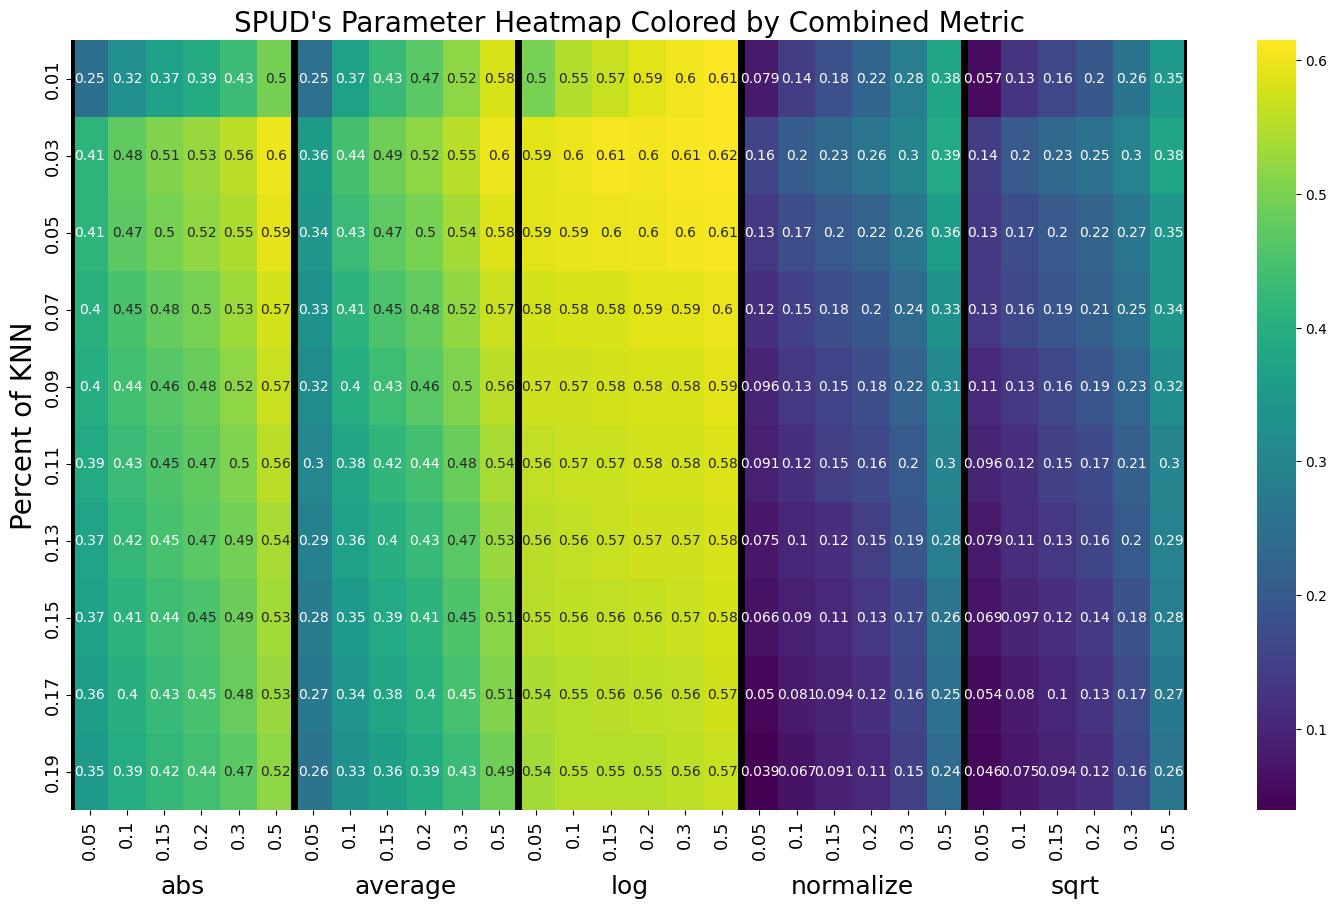

In [36]:
plot_param_heat_map(df = og_df, parameters=["Percent_of_KNN", "Operation", 'Percent_of_Anchors'],method =  "SPUD" , figsize=(18, 10))